# 1. tensorflow v 2.x에서 v1 버전 사용하기

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# v1로 사용가능. 추천되는 방법은 아니다.
# 추천되는 방법으로는 가상환경을 만들어서 v1을 설치하여 사용하는게 좋다.

Instructions for updating:
non-resource variables are not supported in the long term


In [10]:
# tensor =data(상수,변수),연산
node1 = tf.constant('Hello, TensorFlow') # node1 상수 tensor 선언
sess = tf.Session() # graph(computational graph를 생성)
print(sess.run(node1)) # b가 의미하는 것은 byte literals. 
print(sess.run(node1).decode()) # decode붙여주면 없어진다.

b'Hello, TensorFlow'
Hello, TensorFlow


In [12]:
# 간단한 수학 연산 수행(computational graph)
node1 = tf.constant(10, dtype = tf.float32)
node2 = tf.constant(20, dtype = tf.float32)
node3 = tf.add(node1,node2)
sess = tf.Session()
print(sess.run(node3))
print(sess.run([node1,node2,node3]))

30.0
[10.0, 20.0, 30.0]


# 2. Tensorflow
<ol>
    <li> 그래프 정의(build)</li>
    <li> tf.Session()을 실행</li>
    <li> sess.run()을 통해 값을 확인</li>
</ol>

In [15]:
import numpy as np
# tf.내 변수,상수는 넘파이배열로 넣어야 하는게 정석이나, 그냥 리스트를 넣어도 자동으로 넘파이배열로 변환되어 들어간다.
node1 = tf.constant(np.array([1,2,3]),dtype=tf.int16)
node2 = tf.cast(node1,dtype=tf.float32) # 형변환
sess = tf.Session()
print(sess.run(node1))
print(sess.run(node2))

[1 2 3]
[1. 2. 3.]


In [16]:
data = np.array([1.,2.,3.,4.])
m = tf.reduce_mean(data) # redeuce_mean data의 평균값 연산
sess = tf.Session()
print(sess.run(m))

2.5


# 3. tensorflow v1을 이용한 linear regression 구현

##  3.1 독립변수 x가 한개

In [19]:
# tensor graph 정의

# train data set
x = np.array([1,2,3])
y = np.array([1,2,3])

# Weight & Bias (처음에 랜덤값을 세팅한 후 학습과정에서 변경)
w = tf.Variable(tf.random_normal([1]),name='weight') #name은 큰 의미없다.
b = tf.Variable(tf.random_normal([1]),name='bias')

# hypothesis
H = w*x +b

# cost Function(최소제곱법)
cost = tf.reduce_mean(tf.square(H-y)) # square 제곱

# 우리의 목적은 cost 함수가 최소가 되는 w와 b를 찾는 것
'''
cost 함수는 제곱의 평균인 2차 함수이므로 곡선.
곡선위의 미분값이 줄어드는 방향으로 학습.
'''
# v2는 learing_rate 정해주는 방법들이 있지만 v1은 직접 지정
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session 생성
sess = tf.Session()

# variable node 초기화 
sess.run(tf.global_variables_initializer())

# 학습 (tensorflow v2는 fit()함수)
for step in range(1,6001):
    sess.run(train)
    if step%300 == 0:
        print('{}번째 cost:{}, w값:{}, b값:{}'.format(step,sess.run(cost),sess.run(w),sess.run(b)))

300번째 cost:0.03127117082476616, w값:[0.79461527], b값:[0.46688762]
600번째 cost:0.007378736976534128, w값:[0.90023303], b값:[0.22679389]
900번째 cost:0.0017410832224413753, w값:[0.95153755], b값:[0.11016659]
1200번째 cost:0.0004108254797756672, w값:[0.976459], b값:[0.0535142]
1500번째 cost:9.693801985122263e-05, w값:[0.98856485], b값:[0.02599476]
1800번째 cost:2.2873200578032993e-05, w값:[0.9944453], b값:[0.01262711]
2100번째 cost:5.397177574195666e-06, w값:[0.99730176], b값:[0.00613366]
2400번째 cost:1.2734558367810678e-06, w값:[0.9986893], b값:[0.00297951]
2700번째 cost:3.006708482189424e-07, w값:[0.9993631], b값:[0.00144766]
3000번째 cost:7.10658056846114e-08, w값:[0.9996904], b값:[0.00070374]
3300번째 cost:1.684556494296885e-08, w값:[0.9998491], b값:[0.0003426]
3600번째 cost:4.0153440572510135e-09, w값:[0.99992627], b값:[0.00016719]
3900번째 cost:9.53543466408746e-10, w값:[0.9999641], b값:[8.141329e-05]
4200번째 cost:2.268448762166031e-10, w값:[0.9999826], b값:[3.979902e-05]
4500번째 cost:5.4607759286673385e-11, w값:[0.99999136], b값:[1.9

In [22]:
# 다른방법 for문

# train data set
x = np.array([1,2,3])
y = np.array([1,2,3])

# Weight & Bias (처음에 랜덤값을 세팅한 후 학습과정에서 변경)
w = tf.Variable(tf.random_normal([1]),name='weight') #name은 큰 의미없다.
b = tf.Variable(tf.random_normal([1]),name='bias')

# hypothesis
H = w*x +b

# cost Function(최소제곱법)
cost = tf.reduce_mean(tf.square(H-y)) # square 제곱

# 우리의 목적은 cost 함수가 최소가 되는 w와 b를 찾는 것
'''
cost 함수는 제곱의 평균인 2차 함수이므로 곡선.
곡선위의 미분값이 줄어드는 방향으로 학습.
'''
# v2는 learing_rate 정해주는 방법들이 있지만 v1은 직접 지정
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session 생성
sess = tf.Session()

# variable node 초기화 
sess.run(tf.global_variables_initializer())

# 학습 (tensorflow v2는 fit()함수)
for step in range(1, 6001):
    _,cost_val,w_val,b_val = sess.run([train,cost,w,b])
    if step%200==0:
        print('{}번째 cost:{}, w값:{}, b값:{}'.format(step,cost_val,w_val,b_val))

200번째 cost:0.3148391544818878, w값:[0.34987777], b값:[1.4778807]
400번째 cost:0.12022113800048828, w값:[0.5982637], b값:[0.91324115]
600번째 cost:0.04590630531311035, w값:[0.75175136], b값:[0.5643274]
800번째 cost:0.01752924919128418, w값:[0.84659755], b값:[0.3487199]
1000번째 cost:0.0066935340873897076, w값:[0.90520656], b값:[0.21548776]
1200번째 cost:0.002555923769250512, w값:[0.94142336], b값:[0.13315848]
1400번째 cost:0.0009759720996953547, w값:[0.96380323], b값:[0.08228368]
1600번째 cost:0.00037267166771925986, w값:[0.97763264], b값:[0.05084626]
1800번째 cost:0.00014230508531909436, w값:[0.98617834], b값:[0.03141994]
2000번째 cost:5.433794649434276e-05, w값:[0.9914591], b값:[0.0194155]
2200번째 cost:2.0749088434968144e-05, w값:[0.9947222], b값:[0.0119976]
2400번째 cost:7.923321390990168e-06, w값:[0.9967386], b값:[0.00741388]
2600번째 cost:3.025436853931751e-06, w값:[0.9979846], b값:[0.00458138]
2800번째 cost:1.1554483307918417e-06, w값:[0.99875456], b값:[0.00283116]
3000번째 cost:4.4129296838946175e-07, w값:[0.99923027], b값:[0.00174961]

In [24]:
print('최종적으로 나온 회귀식 : H={}*x+{}'.format(w_val[0],b_val[0]))

최종적으로 나온 회귀식 : H=0.9999976754188538*x+4.696268661064096e-06


In [27]:
# train data set
x = np.array([1,2,3])
y = np.array([1,2,3])

# Weight & Bias (처음에 랜덤값을 세팅한 후 학습과정에서 변경)
w = tf.Variable(-100.0,name='weight') #name은 큰 의미없다.
b = tf.Variable(tf.random_normal([1]),name='bias')

# hypothesis
H = w*x +b

# cost Function(최소제곱법)
cost = tf.reduce_mean(tf.square(H-y)) # square 제곱

# 우리의 목적은 cost 함수가 최소가 되는 w와 b를 찾는 것
'''
cost 함수는 제곱의 평균인 2차 함수이므로 곡선.
곡선위의 미분값이 줄어드는 방향으로 학습.
'''
# v2는 learing_rate 정해주는 방법들이 있지만 v1은 직접 지정
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session 생성
sess = tf.Session()

# variable node 초기화 
sess.run(tf.global_variables_initializer())

# 학습 (tensorflow v2는 fit()함수)
for step in range(1, 6001):
    cost_val,w_val,b_val = sess.run([cost,w,b])
    print('{}번째 cost:{}, w값:{}, b값:{}'.format(step,cost_val,w_val,b_val[0]))
    sess.run(train)

1번째 cost:47760.50390625, w값:-100.0, b값:-0.3853636085987091
2번째 cost:37792.125, w값:-90.55792236328125, b값:3.662343978881836
3번째 cost:29912.466796875, w값:-82.15901184082031, b값:7.2514142990112305
4번째 cost:23683.826171875, w값:-74.68756103515625, b값:10.432746887207031
5번째 cost:18760.22265625, w값:-68.04069519042969, b값:13.251594543457031
6번째 cost:14868.1943359375, w값:-62.12696075439453, b값:15.748189926147461
7번째 cost:11791.5615234375, w값:-56.86503982543945, b값:17.95830535888672
8번째 cost:9359.4619140625, w값:-52.18263626098633, b값:19.913740158081055
9번째 cost:7436.83056640625, w값:-48.015472412109375, b값:21.642770767211914
10번째 cost:5916.90771484375, w값:-44.30640411376953, b값:23.170534133911133
11번째 cost:4715.3046875, w값:-41.0046272277832, b값:24.519378662109375
12번째 cost:3765.318359375, w값:-38.064971923828125, b값:25.709177017211914
13번째 cost:3014.220947265625, w값:-35.44727325439453, b값:26.757593154907227
14번째 cost:2420.336669921875, w값:-33.11582946777344, b값:27.68033218383789
15번째 cost:1950.721

342번째 cost:37.842323303222656, w값:-6.144713878631592, b값:16.241615295410156
343번째 cost:37.66060256958008, w값:-6.127538681030273, b값:16.202571868896484
344번째 cost:37.47975158691406, w값:-6.1104044914245605, b값:16.16362190246582
345번째 cost:37.29977798461914, w값:-6.093311786651611, b값:16.124765396118164
346번째 cost:37.120662689208984, w값:-6.076260089874268, b값:16.086002349853516
347번째 cost:36.94239807128906, w값:-6.059249401092529, b값:16.047332763671875
348번째 cost:36.76500701904297, w값:-6.042279243469238, b값:16.008756637573242
349번째 cost:36.58845901489258, w값:-6.025350093841553, b값:15.9702730178833
350번째 cost:36.41275405883789, w값:-6.0084614753723145, b값:15.93188190460205
351번째 cost:36.23789596557617, w값:-5.991613864898682, b값:15.893582344055176
352번째 cost:36.06388473510742, w값:-5.974806308746338, b값:15.855375289916992
353번째 cost:35.89069747924805, w값:-5.958039283752441, b값:15.817259788513184
354번째 cost:35.71834945678711, w값:-5.941312789916992, b값:15.77923583984375
355번째 cost:35.546825408935

717번째 cost:6.223349094390869, w값:-1.8973972797393799, b값:6.586464881896973
718번째 cost:6.1934638023376465, w값:-1.8904321193695068, b값:6.570631504058838
719번째 cost:6.163722991943359, w값:-1.8834837675094604, b값:6.554836273193359
720번째 cost:6.1341233253479, w값:-1.8765521049499512, b값:6.539078712463379
721번째 cost:6.104668140411377, w값:-1.8696370124816895, b값:6.523359298706055
722번째 cost:6.075352191925049, w값:-1.8627386093139648, b값:6.5076775550842285
723번째 cost:6.046176910400391, w값:-1.8558567762374878, b값:6.4920334815979
724번째 cost:6.017143249511719, w값:-1.8489915132522583, b값:6.47642707824707
725번째 cost:5.9882493019104, w값:-1.8421427011489868, b값:6.460858345031738
726번째 cost:5.959492206573486, w값:-1.8353103399276733, b값:6.445326805114746
727번째 cost:5.930873870849609, w값:-1.8284944295883179, b값:6.429832458496094
728번째 cost:5.902394771575928, w값:-1.8216949701309204, b값:6.4143757820129395
729번째 cost:5.874050617218018, w값:-1.8149118423461914, b값:6.398956298828125
730번째 cost:5.845842361450195,

1093번째 cost:1.0185467004776, w값:-0.17215874791145325, b값:2.6645925045013428
1094번째 cost:1.0136555433273315, w값:-0.16934096813201904, b값:2.658186912536621
1095번째 cost:1.008787989616394, w값:-0.16652995347976685, b값:2.651796817779541
1096번째 cost:1.0039435625076294, w값:-0.16372570395469666, b값:2.6454219818115234
1097번째 cost:0.9991225600242615, w값:-0.16092818975448608, b값:2.6390626430511475
1098번째 cost:0.9943247437477112, w값:-0.15813739597797394, b값:2.632718563079834
1099번째 cost:0.9895500540733337, w값:-0.15535330772399902, b값:2.626389741897583
1100번째 cost:0.9847981929779053, w값:-0.15257592499256134, b값:2.6200761795043945
1101번째 cost:0.9800691604614258, w값:-0.1498052179813385, b값:2.6137776374816895
1102번째 cost:0.9753625988960266, w값:-0.1470411717891693, b값:2.607494354248047
1103번째 cost:0.970678985118866, w값:-0.14428377151489258, b값:2.6012260913848877
1104번째 cost:0.966017484664917, w값:-0.1415330022573471, b값:2.594972848892212
1105번째 cost:0.9613787531852722, w값:-0.1387888342142105, b값:2.588734

1465번째 cost:0.1699414849281311, w값:0.5212092995643616, b값:1.0884037017822266
1466번째 cost:0.16912545263767242, w값:0.5223602652549744, b값:1.085787296295166
1467번째 cost:0.16831327974796295, w값:0.5235084891319275, b값:1.083177089691162
1468번째 cost:0.16750498116016388, w값:0.524653971195221, b값:1.0805732011795044
1469번째 cost:0.16670064628124237, w값:0.52579665184021, b값:1.0779756307601929
1470번째 cost:0.1659001260995865, w값:0.5269365906715393, b값:1.075384259223938
1471번째 cost:0.165103480219841, w값:0.528073787689209, b값:1.0727990865707397
1472번째 cost:0.16431061923503876, w값:0.529208242893219, b값:1.0702201128005981
1473번째 cost:0.16352157294750214, w값:0.5303400158882141, b값:1.0676473379135132
1474번째 cost:0.16273634135723114, w값:0.5314690470695496, b값:1.0650807619094849
1475번째 cost:0.161954864859581, w값:0.5325953960418701, b값:1.0625203847885132
1476번째 cost:0.1611771583557129, w값:0.533719003200531, b값:1.0599662065505981
1477번째 cost:0.16040314733982086, w값:0.534839928150177, b값:1.0574181079864502
147

1838번째 cost:0.028218058869242668, w값:0.8048990368843079, b값:0.4435105323791504
1839번째 cost:0.02808254398405552, w값:0.8053680658340454, b값:0.4424443542957306
1840번째 cost:0.027947701513767242, w값:0.8058359622955322, b값:0.44138073921203613
1841번째 cost:0.027813496068120003, w값:0.8063027262687683, b값:0.440319687128067
1842번째 cost:0.027679936960339546, w값:0.8067683577537537, b값:0.43926119804382324
1843번째 cost:0.027547011151909828, w값:0.8072328567504883, b값:0.4382052421569824
1844번째 cost:0.02741473913192749, w값:0.8076962232589722, b값:0.43715181946754456
1845번째 cost:0.027283066883683205, w값:0.8081585168838501, b값:0.43610092997550964
1846번째 cost:0.02715206891298294, w값:0.8086196780204773, b값:0.4350525736808777
1847번째 cost:0.027021663263440132, w값:0.8090797662734985, b값:0.4340067207813263
1848번째 cost:0.026891926303505898, w값:0.809538722038269, b값:0.43296340107917786
1849번째 cost:0.026762783527374268, w값:0.8099965453147888, b값:0.43192258477211
1850번째 cost:0.026634274050593376, w값:0.810453295707702

2216번째 cost:0.004574065562337637, w값:0.9214497804641724, b값:0.17856308817863464
2217번째 cost:0.004552100319415331, w값:0.9216386079788208, b값:0.17813383042812347
2218번째 cost:0.004530241247266531, w값:0.921826958656311, b값:0.17770561575889587
2219번째 cost:0.004508493468165398, w값:0.9220148921012878, b값:0.17727842926979065
2220번째 cost:0.00448684161528945, w값:0.9222023487091064, b값:0.1768522709608078
2221번째 cost:0.004465299192816019, w값:0.9223893880844116, b값:0.17642712593078613
2222번째 cost:0.0044438522309064865, w값:0.9225759506225586, b값:0.17600300908088684
2223번째 cost:0.004422514233738184, w값:0.9227620959281921, b값:0.17557990550994873
2224번째 cost:0.004401279613375664, w값:0.9229477643966675, b값:0.175157830119133
2225번째 cost:0.004380135331302881, w값:0.9231330156326294, b값:0.17473676800727844
2226번째 cost:0.0043591102585196495, w값:0.9233177900314331, b값:0.17431670427322388
2227번째 cost:0.004338174592703581, w값:0.9235021471977234, b값:0.1738976538181305
2228번째 cost:0.004317340906709433, w값:0.92368

2628번째 cost:0.000629505084361881, w값:0.9708595871925354, b값:0.06624303758144379
2629번째 cost:0.0006264831172302365, w값:0.9709296226501465, b값:0.06608379632234573
2630번째 cost:0.0006234748871065676, w값:0.9709994792938232, b값:0.06592493504285812
2631번째 cost:0.0006204824312590063, w값:0.9710692167282104, b값:0.06576645374298096
2632번째 cost:0.0006175002781674266, w값:0.9711387753486633, b값:0.06560835987329483
2633번째 cost:0.00061453488888219, w값:0.9712081551551819, b값:0.06545063853263855
2634번째 cost:0.0006115830619819462, w값:0.9712773561477661, b값:0.06529329717159271
2635번째 cost:0.0006086480570957065, w값:0.971346378326416, b값:0.06513633579015732
2636번째 cost:0.0006057251594029367, w값:0.9714152812957764, b값:0.06497975438833237
2637번째 cost:0.0006028154748491943, w값:0.9714840054512024, b값:0.06482354551553726
2638번째 cost:0.0005999224376864731, w값:0.9715525507926941, b값:0.0646677166223526
2639번째 cost:0.0005970424972474575, w값:0.9716209173202515, b값:0.06451226025819778
2640번째 cost:0.0005941744311712682

2993번째 cost:0.0001086298143491149, w값:0.9878948330879211, b값:0.02751791849732399
2994번째 cost:0.00010810819367179647, w값:0.9879239201545715, b값:0.027451766654849052
2995번째 cost:0.00010758941061794758, w값:0.9879529476165771, b값:0.02738577499985695
2996번째 cost:0.00010707203909987584, w값:0.987981915473938, b값:0.02731994166970253
2997번째 cost:0.00010655884398147464, w값:0.988010823726654, b값:0.027254264801740646
2998번째 cost:0.00010604705312289298, w값:0.9880396723747253, b값:0.027188746258616447
2999번째 cost:0.00010553716128924862, w값:0.9880684018135071, b값:0.027123384177684784
3000번째 cost:0.00010503143857931718, w값:0.988097071647644, b값:0.027058180421590805
3001번째 cost:0.0001045270764734596, w값:0.9881256818771362, b값:0.02699313499033451
3002번째 cost:0.00010402409679954872, w값:0.9881542325019836, b값:0.026928246021270752
3003번째 cost:0.00010352519893785939, w값:0.9881827235221863, b값:0.02686351165175438
3004번째 cost:0.0001030276544042863, w값:0.9882111549377441, b값:0.026798933744430542
3005번째 cost:0.0

3375번째 cost:1.727270137052983e-05, w값:0.9951730370521545, b값:0.010972938500344753
3376번째 cost:1.718986823107116e-05, w값:0.9951846599578857, b값:0.010946557857096195
3377번째 cost:1.7107604435295798e-05, w값:0.9951962232589722, b값:0.010920240543782711
3378번째 cost:1.702515692159068e-05, w값:0.9952077865600586, b값:0.010893987491726875
3379번째 cost:1.6943271475611255e-05, w값:0.9952192902565002, b값:0.010867795906960964
3380번째 cost:1.686174982751254e-05, w값:0.9952307939529419, b값:0.010841667652130127
3381번째 cost:1.6780793885118328e-05, w값:0.9952422380447388, b값:0.010815601795911789
3382번째 cost:1.6700196283636615e-05, w값:0.9952536821365356, b값:0.010789599269628525
3383번째 cost:1.662015711190179e-05, w값:0.9952650666236877, b값:0.01076365914195776
3384번째 cost:1.654047991905827e-05, w값:0.9952764511108398, b값:0.010737783275544643
3385번째 cost:1.6461353880004026e-05, w값:0.9952877759933472, b값:0.010711969807744026
3386번째 cost:1.638204230403062e-05, w값:0.9952991008758545, b값:0.010686220601201057
3387번째 cost:

3739번째 cost:2.9952091153973015e-06, w값:0.9979898929595947, b값:0.004569324664771557
3740번째 cost:2.9807724786223844e-06, w값:0.9979947209358215, b값:0.004558342508971691
3741번째 cost:2.9666300633834908e-06, w값:0.9979995489120483, b값:0.004547386430203915
3742번째 cost:2.9523205284931464e-06, w값:0.9980043768882751, b값:0.004536457359790802
3743번째 cost:2.9380728392425226e-06, w값:0.998009204864502, b값:0.004525553435087204
3744번째 cost:2.923972033386235e-06, w값:0.998013973236084, b값:0.004514674190431833
3745번째 cost:2.9099346647853963e-06, w값:0.998018741607666, b값:0.004503821954131126
3746번째 cost:2.895959141824278e-06, w값:0.998023509979248, b값:0.004492995794862509
3747번째 cost:2.8820450097555295e-06, w값:0.9980282783508301, b값:0.00448219571262598
3748번째 cost:2.8681915864581242e-06, w값:0.9980330467224121, b값:0.004471420776098967
3749번째 cost:2.8544830001919763e-06, w값:0.9980377554893494, b값:0.00446067051962018
3750번째 cost:2.840835804818198e-06, w값:0.9980424642562866, b값:0.0044499472714960575
3751번째 cost:

4119번째 cost:4.810448785974586e-07, w값:0.9991945028305054, b값:0.0018311032326892018
4120번째 cost:4.787061129718495e-07, w값:0.999196469783783, b값:0.001826701802201569
4121번째 cost:4.7641151468269527e-07, w값:0.9991983771324158, b값:0.001822309335693717
4122번째 cost:4.74127546112868e-07, w값:0.9992002844810486, b값:0.0018179285107180476
4123번째 cost:4.7185395146698283e-07, w값:0.9992021918296814, b값:0.0018135589780285954
4124번째 cost:4.6959064547991147e-07, w값:0.9992040991783142, b값:0.0018092005047947168
4125번째 cost:4.6733757130823506e-07, w값:0.999206006526947, b값:0.00180485297460109
4126번째 cost:4.650944731565687e-07, w값:0.9992079138755798, b값:0.0018005160382017493
4127번째 cost:4.6286126575978415e-07, w값:0.9992098212242126, b값:0.0017961895791813731
4128번째 cost:4.606378922744625e-07, w값:0.9992117285728455, b값:0.0017918733647093177
4129번째 cost:4.584241821703472e-07, w값:0.9992136359214783, b값:0.0017875671619549394
4130번째 cost:4.562199364954722e-07, w값:0.9992155432701111, b값:0.0017832707380875945
4131번째

4502번째 cost:7.624925046911812e-08, w값:0.9996791481971741, b값:0.000729041697923094
4503번째 cost:7.591150819052928e-08, w값:0.9996799230575562, b값:0.0007272945367731154
4504번째 cost:7.553845904340051e-08, w값:0.9996806979179382, b값:0.0007255524978972971
4505번째 cost:7.516693756315362e-08, w값:0.9996814727783203, b값:0.0007238139514811337
4506번째 cost:7.479692243350655e-08, w값:0.9996822476387024, b값:0.0007220787811093032
4507번째 cost:7.442840654903193e-08, w값:0.9996830224990845, b값:0.0007203469285741448
4508번째 cost:7.409789049006577e-08, w값:0.9996837973594666, b값:0.0007186182774603367
4509번째 cost:7.373247257191906e-08, w값:0.9996845722198486, b값:0.0007168943993747234
4510번째 cost:7.336848995009859e-08, w값:0.9996853470802307, b값:0.0007151736062951386
4511번째 cost:7.304220872583755e-08, w값:0.9996861219406128, b값:0.0007134558400139213
4512번째 cost:7.268122459436199e-08, w값:0.9996868968009949, b값:0.0007117426139302552
4513번째 cost:7.232166154835795e-08, w값:0.999687671661377, b값:0.0007100322982296348
4514번째

4892번째 cost:1.1743682470921613e-08, w값:0.9998739957809448, b값:0.0002859444357454777
4893번째 cost:1.168445162846865e-08, w값:0.9998742938041687, b값:0.000285266520222649
4894번째 cost:1.162545526511849e-08, w값:0.9998745918273926, b값:0.00028458982706069946
4895번째 cost:1.156669071633587e-08, w값:0.9998748898506165, b값:0.00028391435625962913
4896번째 cost:1.1508158870299212e-08, w값:0.9998751878738403, b값:0.0002832400787156075
4897번째 cost:1.1464305949004938e-08, w값:0.9998754858970642, b값:0.0002825669653248042
4898번째 cost:1.1406291910986965e-08, w값:0.9998757839202881, b값:0.0002818965876940638
4899번째 cost:1.1348498141217078e-08, w값:0.999876081943512, b값:0.0002812272869050503
4900번째 cost:1.130527849113605e-08, w값:0.9998763799667358, b값:0.00028055906295776367
4901번째 cost:1.1247986542173294e-08, w값:0.9998766779899597, b값:0.00027989348745904863
4902번째 cost:1.1190908644209685e-08, w값:0.9998769760131836, b값:0.0002792289014905691
4903번째 cost:1.1134041244531545e-08, w값:0.9998772740364075, b값:0.00027856527594

5285번째 cost:1.799691506931822e-09, w값:0.9999505877494812, b값:0.00011188329517608508
5286번째 cost:1.7883783343108917e-09, w값:0.9999507069587708, b값:0.00011162251757923514
5287번째 cost:1.7828388765295244e-09, w값:0.9999508261680603, b값:0.00011136139073641971
5288번째 cost:1.771604640765645e-09, w값:0.9999509453773499, b값:0.00011110151535831392
5289번째 cost:1.7661125895074292e-09, w값:0.9999510645866394, b값:0.00011084127618232742
5290번째 cost:1.7549560693552735e-09, w값:0.999951183795929, b값:0.00011058226664317772
5291번째 cost:1.7495099813302772e-09, w값:0.9999513030052185, b값:0.00011032287147827446
5292번째 cost:1.7384301775891231e-09, w값:0.9999514222145081, b값:0.00011006469139829278
5293번째 cost:1.7330289425743217e-09, w값:0.9999515414237976, b값:0.00010980611114064232
5294번째 cost:1.722024856043447e-09, w값:0.9999516606330872, b값:0.00010954873141599819
5295번째 cost:1.7166675858604208e-09, w값:0.9999517798423767, b값:0.00010929093696177006
5296번째 cost:1.7057383283614058e-09, w값:0.9999518990516663, b값:0.00010

5657번째 cost:3.0704200293385497e-10, w값:0.9999798536300659, b값:4.623617132892832e-05
5658번째 cost:3.04886449420394e-10, w값:0.9999799132347107, b값:4.611809708876535e-05
5659번째 cost:3.0273783480083694e-10, w값:0.9999799728393555, b값:4.599960448103957e-05
5660번째 cost:3.0133809336696515e-10, w값:0.9999799728393555, b값:4.5880697143729776e-05
5661번째 cost:2.992194825246486e-10, w값:0.9999800324440002, b값:4.576416904455982e-05
5662번째 cost:2.971076162872066e-10, w값:0.999980092048645, b값:4.564718983601779e-05
5663번째 cost:2.9722080352456715e-10, w값:0.9999801516532898, b값:4.5529770432040095e-05
5664번째 cost:2.9512206567439137e-10, w값:0.9999802112579346, b값:4.541350790532306e-05
5665번째 cost:2.9303001691793895e-10, w값:0.9999802708625793, b값:4.529678699327633e-05
5666번째 cost:2.9167090964676845e-10, w값:0.9999802708625793, b값:4.5179618609836325e-05
5667번째 cost:2.9182384286841057e-10, w값:0.9999803304672241, b값:4.506479308474809e-05
5668번째 cost:2.8976571142536045e-10, w값:0.9999803900718689, b값:4.49510735052172

## 3.2 predict를 하기 위한 placeholder 노드

In [28]:
# placeholer 이용
a = tf.placeholder(dtype = tf.float32)
b = tf.placeholder(dtype = tf.float32)
#ab = tf.add(a+b)
ab = a + b
sess = tf.Session()
sess.run(ab,feed_dict={a:10,b:20})

30.0

In [29]:
sess.run(ab,feed_dict={a:[1,2,3],
                      b:[10,10,10]})

array([11., 12., 13.], dtype=float32)

In [30]:
sess.run(ab,feed_dict={a:np.array([1,2,3]),
                      b:np.array([10,10,10])})

array([11., 12., 13.], dtype=float32)

In [31]:
# 그래프 실행 단계에서 값을 준다
node1 = tf.placeholder(tf.float32)
node2 = tf.placeholder(tf.float32)
adder_node = node1 + node2 
sess = tf.Session()
result = sess.run(adder_node,feed_dict={node1: input('node1값은?'),
                                       node2 : input('node2값은?')})
print(result)

node1값은?10
node2값은?20
30.0


In [33]:
# training data set (H = 2x + 3)
x_data = [1,2,3]
y_data = [5,7,9]

# placeholder 설정
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([1]),name = 'weight')
b = tf.Variable(tf.random_normal([1]),name = 'bias')

# hypothesis
H = W*x + b

# cost function
cost = tf.reduce_mean(tf.square(H - y))

# 최소제곱법으로 cost를 줄이는 방향(경사하강법)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session, variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,6001):
    _,cost_val,W_val,b_val = sess.run([train,cost,W,b],feed_dict={x:x_data,y:y_data})
    if step%200 ==0:
        print('{}번째, cost : {}, w : {}, b : {}'.format(step,cost_val,W_val,b_val))
    

200번째, cost : 0.11230971664190292, w : [2.388293], b : [2.1173189]
400번째, cost : 0.04288547858595848, w : [2.2399418], b : [2.454556]
600번째, cost : 0.016375763341784477, w : [2.1482694], b : [2.662949]
800번째, cost : 0.00625305762514472, w : [2.0916212], b : [2.7917235]
1000번째, cost : 0.002387716667726636, w : [2.0566163], b : [2.871298]
1200번째, cost : 0.0009117322624661028, w : [2.0349853], b : [2.9204705]
1400번째, cost : 0.0003481404564809054, w : [2.0216188], b : [2.9508555]
1600번째, cost : 0.00013293283700477332, w : [2.0133588], b : [2.9696324]
1800번째, cost : 5.076362504041754e-05, w : [2.0082552], b : [2.981234]
2000번째, cost : 1.938459354278166e-05, w : [2.0051012], b : [2.9884033]
2200번째, cost : 7.405434644169873e-06, w : [2.003153], b : [2.992833]
2400번째, cost : 2.8298154575168155e-06, w : [2.0019493], b : [2.9955692]
2600번째, cost : 1.0820419902302092e-06, w : [2.001206], b : [2.9972606]
2800번째, cost : 4.1433546016378386e-07, w : [2.0007458], b : [2.9983044]
3000번째, cost : 1.59086

In [34]:
sess.run([W,b])

[array([2.000026], dtype=float32), array([2.999942], dtype=float32)]

In [35]:
# 예측해보기(predict)
sess.run(H,feed_dict={x:5})

array([13.000072], dtype=float32)

In [36]:
sess.run(H,feed_dict={x:np.array([1,10,20])})

array([ 4.999968, 23.000202, 43.00046 ], dtype=float32)

## 3.3 scale이 다른 데이터들의 linear regression을 구현

In [39]:
# training data set 
x_data = [1,2,5,8,10]
y_data = [5,15,68,80,95]

# placeholder를 설정
x = tf.placeholder(dtype = tf.float32, shape=None) #shape 어떤 입력값이 오는지 설정 가능. None은 기본값
y = tf.placeholder(dtype = tf.float32)
# Weight & bias
W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')
# Hypothesis
H = W*x + b
# cost function
cost = tf.reduce_mean(tf.square(H - y))
# optimizer , train 
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# session & variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,6001):
    _,c_val,w_val=sess.run([train,cost,W],feed_dict={x:x_data,
                                                     y:y_data})
    print('{}번째 cost : {}, W : {}'.format(step,c_val,w_val))

# 예측을 할 수는 있다. 다만 cost값이 커서 신뢰도가 낮다
# 예측이 제대로 안 되는 이유 : GradientDescentOptimizer에서 local 최소값을 만나면
# global 최소값이 따로 있어도 멈춤. 더 저점이 있는데 추세상승선을 만나서 최저점을 찾아가기전에 멈춤.

1번째 cost : 3295.26513671875, W : [8.010261]
2번째 cost : 222.08822631835938, W : [9.49482]
3번째 cost : 86.60640716552734, W : [9.807781]
4번째 cost : 80.62045288085938, W : [9.874754]
5번째 cost : 80.34288787841797, W : [9.890073]
6번째 cost : 80.31715393066406, W : [9.894539]
7번째 cost : 80.30265808105469, W : [9.896719]
8번째 cost : 80.28882598876953, W : [9.898412]
9번째 cost : 80.27519226074219, W : [9.899995]
10번째 cost : 80.26168060302734, W : [9.901548]
11번째 cost : 80.24837493896484, W : [9.903087]
12번째 cost : 80.23518371582031, W : [9.904616]
13번째 cost : 80.22220611572266, W : [9.906136]
14번째 cost : 80.20936584472656, W : [9.907646]
15번째 cost : 80.19664764404297, W : [9.909148]
16번째 cost : 80.18409729003906, W : [9.910641]
17번째 cost : 80.17167663574219, W : [9.912126]
18번째 cost : 80.15941619873047, W : [9.913601]
19번째 cost : 80.14734649658203, W : [9.915067]
20번째 cost : 80.1353759765625, W : [9.916524]
21번째 cost : 80.12353515625, W : [9.9179735]
22번째 cost : 80.11184692382812, W : [9.919414]
2

314번째 cost : 79.1691665649414, W : [10.11782]
315번째 cost : 79.16883087158203, W : [10.11807]
316번째 cost : 79.16848754882812, W : [10.118319]
317번째 cost : 79.16813659667969, W : [10.1185665]
318번째 cost : 79.16778564453125, W : [10.118813]
319번째 cost : 79.16748809814453, W : [10.119057]
320번째 cost : 79.1671371459961, W : [10.119299]
321번째 cost : 79.16681671142578, W : [10.11954]
322번째 cost : 79.16645812988281, W : [10.119781]
323번째 cost : 79.16614532470703, W : [10.12002]
324번째 cost : 79.16585540771484, W : [10.120257]
325번째 cost : 79.16551208496094, W : [10.120493]
326번째 cost : 79.16523742675781, W : [10.120728]
327번째 cost : 79.16490936279297, W : [10.12096]
328번째 cost : 79.16461181640625, W : [10.121192]
329번째 cost : 79.16431427001953, W : [10.121422]
330번째 cost : 79.16403198242188, W : [10.121651]
331번째 cost : 79.16373443603516, W : [10.121879]
332번째 cost : 79.1634521484375, W : [10.122105]
333번째 cost : 79.16316223144531, W : [10.12233]
334번째 cost : 79.1628646850586, W : [10.122553]
3

625번째 cost : 79.14020538330078, W : [10.153301]
626번째 cost : 79.14018249511719, W : [10.153339]
627번째 cost : 79.14018249511719, W : [10.1533785]
628번째 cost : 79.14015197753906, W : [10.153418]
629번째 cost : 79.14012145996094, W : [10.153456]
630번째 cost : 79.14013671875, W : [10.153494]
631번째 cost : 79.14013671875, W : [10.153532]
632번째 cost : 79.14009857177734, W : [10.153569]
633번째 cost : 79.14013671875, W : [10.153607]
634번째 cost : 79.14009857177734, W : [10.153645]
635번째 cost : 79.14010620117188, W : [10.153682]
636번째 cost : 79.14006805419922, W : [10.153718]
637번째 cost : 79.14009094238281, W : [10.153754]
638번째 cost : 79.14006805419922, W : [10.15379]
639번째 cost : 79.14009094238281, W : [10.153827]
640번째 cost : 79.14007568359375, W : [10.153863]
641번째 cost : 79.14005279541016, W : [10.153899]
642번째 cost : 79.14005279541016, W : [10.1539345]
643번째 cost : 79.14005279541016, W : [10.15397]
644번째 cost : 79.1400146484375, W : [10.154005]
645번째 cost : 79.13999938964844, W : [10.154039]
64

911번째 cost : 79.13948059082031, W : [10.158674]
912번째 cost : 79.13945770263672, W : [10.158682]
913번째 cost : 79.13945770263672, W : [10.158689]
914번째 cost : 79.13949584960938, W : [10.158695]
915번째 cost : 79.13947296142578, W : [10.158703]
916번째 cost : 79.13948059082031, W : [10.15871]
917번째 cost : 79.13946533203125, W : [10.158716]
918번째 cost : 79.13949584960938, W : [10.158723]
919번째 cost : 79.13948059082031, W : [10.1587305]
920번째 cost : 79.13947296142578, W : [10.158737]
921번째 cost : 79.13948059082031, W : [10.158744]
922번째 cost : 79.13945770263672, W : [10.158751]
923번째 cost : 79.13948059082031, W : [10.158756]
924번째 cost : 79.13946533203125, W : [10.158764]
925번째 cost : 79.13947296142578, W : [10.158771]
926번째 cost : 79.13948822021484, W : [10.158776]
927번째 cost : 79.13945770263672, W : [10.158783]
928번째 cost : 79.13948059082031, W : [10.15879]
929번째 cost : 79.13947296142578, W : [10.158795]
930번째 cost : 79.13948822021484, W : [10.158802]
931번째 cost : 79.13948059082031, W : [10.1

1218번째 cost : 79.13947296142578, W : [10.159674]
1219번째 cost : 79.13946533203125, W : [10.159675]
1220번째 cost : 79.13946533203125, W : [10.159676]
1221번째 cost : 79.13945007324219, W : [10.1596775]
1222번째 cost : 79.13944244384766, W : [10.159678]
1223번째 cost : 79.1394271850586, W : [10.159679]
1224번째 cost : 79.13945770263672, W : [10.15968]
1225번째 cost : 79.13945770263672, W : [10.159681]
1226번째 cost : 79.13945007324219, W : [10.159682]
1227번째 cost : 79.13945007324219, W : [10.159683]
1228번째 cost : 79.13945007324219, W : [10.159684]
1229번째 cost : 79.13945007324219, W : [10.159686]
1230번째 cost : 79.13945007324219, W : [10.159687]
1231번째 cost : 79.13945007324219, W : [10.159688]
1232번째 cost : 79.13945007324219, W : [10.159689]
1233번째 cost : 79.13945007324219, W : [10.15969]
1234번째 cost : 79.13945007324219, W : [10.159691]
1235번째 cost : 79.13945007324219, W : [10.159692]
1236번째 cost : 79.13945007324219, W : [10.159693]
1237번째 cost : 79.13945007324219, W : [10.159694]
1238번째 cost : 79.13945

1521번째 cost : 79.13946533203125, W : [10.159832]
1522번째 cost : 79.13943481445312, W : [10.159833]
1523번째 cost : 79.13946533203125, W : [10.159833]
1524번째 cost : 79.13945770263672, W : [10.159833]
1525번째 cost : 79.13945007324219, W : [10.159833]
1526번째 cost : 79.13948059082031, W : [10.159833]
1527번째 cost : 79.13945007324219, W : [10.159834]
1528번째 cost : 79.13943481445312, W : [10.159834]
1529번째 cost : 79.13945007324219, W : [10.159834]
1530번째 cost : 79.13945007324219, W : [10.159834]
1531번째 cost : 79.13944244384766, W : [10.159834]
1532번째 cost : 79.13947296142578, W : [10.159834]
1533번째 cost : 79.13944244384766, W : [10.159835]
1534번째 cost : 79.13943481445312, W : [10.159835]
1535번째 cost : 79.13945770263672, W : [10.159835]
1536번째 cost : 79.13945770263672, W : [10.159835]
1537번째 cost : 79.13945007324219, W : [10.159835]
1538번째 cost : 79.13946533203125, W : [10.159835]
1539번째 cost : 79.13944244384766, W : [10.159836]
1540번째 cost : 79.13944244384766, W : [10.159836]
1541번째 cost : 79.139

1818번째 cost : 79.13944244384766, W : [10.159859]
1819번째 cost : 79.13944244384766, W : [10.159859]
1820번째 cost : 79.13946533203125, W : [10.159859]
1821번째 cost : 79.13946533203125, W : [10.159859]
1822번째 cost : 79.13946533203125, W : [10.159859]
1823번째 cost : 79.13946533203125, W : [10.159859]
1824번째 cost : 79.13946533203125, W : [10.159859]
1825번째 cost : 79.13945007324219, W : [10.159859]
1826번째 cost : 79.13945007324219, W : [10.159859]
1827번째 cost : 79.13945007324219, W : [10.159859]
1828번째 cost : 79.13945007324219, W : [10.159859]
1829번째 cost : 79.13945007324219, W : [10.159859]
1830번째 cost : 79.13945007324219, W : [10.159859]
1831번째 cost : 79.13945007324219, W : [10.159859]
1832번째 cost : 79.13945007324219, W : [10.159859]
1833번째 cost : 79.13945007324219, W : [10.159859]
1834번째 cost : 79.13945007324219, W : [10.159859]
1835번째 cost : 79.13945007324219, W : [10.159859]
1836번째 cost : 79.13945007324219, W : [10.159859]
1837번째 cost : 79.13945007324219, W : [10.159859]
1838번째 cost : 79.139

2098번째 cost : 79.13947296142578, W : [10.159862]
2099번째 cost : 79.13947296142578, W : [10.159862]
2100번째 cost : 79.13947296142578, W : [10.159862]
2101번째 cost : 79.13947296142578, W : [10.159862]
2102번째 cost : 79.13947296142578, W : [10.159862]
2103번째 cost : 79.13947296142578, W : [10.159862]
2104번째 cost : 79.13947296142578, W : [10.159862]
2105번째 cost : 79.13947296142578, W : [10.159862]
2106번째 cost : 79.13947296142578, W : [10.159862]
2107번째 cost : 79.13947296142578, W : [10.159862]
2108번째 cost : 79.13947296142578, W : [10.159862]
2109번째 cost : 79.13947296142578, W : [10.159862]
2110번째 cost : 79.13947296142578, W : [10.159862]
2111번째 cost : 79.13947296142578, W : [10.159862]
2112번째 cost : 79.13947296142578, W : [10.159862]
2113번째 cost : 79.13947296142578, W : [10.159862]
2114번째 cost : 79.13947296142578, W : [10.159862]
2115번째 cost : 79.13947296142578, W : [10.159862]
2116번째 cost : 79.13947296142578, W : [10.159862]
2117번째 cost : 79.13947296142578, W : [10.159862]
2118번째 cost : 79.139

2403번째 cost : 79.13945770263672, W : [10.1598625]
2404번째 cost : 79.13945770263672, W : [10.1598625]
2405번째 cost : 79.13945770263672, W : [10.1598625]
2406번째 cost : 79.13945770263672, W : [10.1598625]
2407번째 cost : 79.13945770263672, W : [10.1598625]
2408번째 cost : 79.13945770263672, W : [10.1598625]
2409번째 cost : 79.13945770263672, W : [10.1598625]
2410번째 cost : 79.13945770263672, W : [10.1598625]
2411번째 cost : 79.13945770263672, W : [10.1598625]
2412번째 cost : 79.13945770263672, W : [10.1598625]
2413번째 cost : 79.13945770263672, W : [10.1598625]
2414번째 cost : 79.13945770263672, W : [10.1598625]
2415번째 cost : 79.13945770263672, W : [10.1598625]
2416번째 cost : 79.13945770263672, W : [10.1598625]
2417번째 cost : 79.13945770263672, W : [10.1598625]
2418번째 cost : 79.13945770263672, W : [10.1598625]
2419번째 cost : 79.13945770263672, W : [10.1598625]
2420번째 cost : 79.13945770263672, W : [10.1598625]
2421번째 cost : 79.13945770263672, W : [10.1598625]
2422번째 cost : 79.13945770263672, W : [10.1598625]


2689번째 cost : 79.13945770263672, W : [10.1598625]
2690번째 cost : 79.13945770263672, W : [10.1598625]
2691번째 cost : 79.13945770263672, W : [10.1598625]
2692번째 cost : 79.13945770263672, W : [10.1598625]
2693번째 cost : 79.13945770263672, W : [10.1598625]
2694번째 cost : 79.13945770263672, W : [10.1598625]
2695번째 cost : 79.13945770263672, W : [10.1598625]
2696번째 cost : 79.13945770263672, W : [10.1598625]
2697번째 cost : 79.13945770263672, W : [10.1598625]
2698번째 cost : 79.13945770263672, W : [10.1598625]
2699번째 cost : 79.13945770263672, W : [10.1598625]
2700번째 cost : 79.13945770263672, W : [10.1598625]
2701번째 cost : 79.13945770263672, W : [10.1598625]
2702번째 cost : 79.13945770263672, W : [10.1598625]
2703번째 cost : 79.13945770263672, W : [10.1598625]
2704번째 cost : 79.13945770263672, W : [10.1598625]
2705번째 cost : 79.13945770263672, W : [10.1598625]
2706번째 cost : 79.13945770263672, W : [10.1598625]
2707번째 cost : 79.13945770263672, W : [10.1598625]
2708번째 cost : 79.13945770263672, W : [10.1598625]


3009번째 cost : 79.13945770263672, W : [10.1598625]
3010번째 cost : 79.13945770263672, W : [10.1598625]
3011번째 cost : 79.13945770263672, W : [10.1598625]
3012번째 cost : 79.13945770263672, W : [10.1598625]
3013번째 cost : 79.13945770263672, W : [10.1598625]
3014번째 cost : 79.13945770263672, W : [10.1598625]
3015번째 cost : 79.13945770263672, W : [10.1598625]
3016번째 cost : 79.13945770263672, W : [10.1598625]
3017번째 cost : 79.13945770263672, W : [10.1598625]
3018번째 cost : 79.13945770263672, W : [10.1598625]
3019번째 cost : 79.13945770263672, W : [10.1598625]
3020번째 cost : 79.13945770263672, W : [10.1598625]
3021번째 cost : 79.13945770263672, W : [10.1598625]
3022번째 cost : 79.13945770263672, W : [10.1598625]
3023번째 cost : 79.13945770263672, W : [10.1598625]
3024번째 cost : 79.13945770263672, W : [10.1598625]
3025번째 cost : 79.13945770263672, W : [10.1598625]
3026번째 cost : 79.13945770263672, W : [10.1598625]
3027번째 cost : 79.13945770263672, W : [10.1598625]
3028번째 cost : 79.13945770263672, W : [10.1598625]


3318번째 cost : 79.13945770263672, W : [10.1598625]
3319번째 cost : 79.13945770263672, W : [10.1598625]
3320번째 cost : 79.13945770263672, W : [10.1598625]
3321번째 cost : 79.13945770263672, W : [10.1598625]
3322번째 cost : 79.13945770263672, W : [10.1598625]
3323번째 cost : 79.13945770263672, W : [10.1598625]
3324번째 cost : 79.13945770263672, W : [10.1598625]
3325번째 cost : 79.13945770263672, W : [10.1598625]
3326번째 cost : 79.13945770263672, W : [10.1598625]
3327번째 cost : 79.13945770263672, W : [10.1598625]
3328번째 cost : 79.13945770263672, W : [10.1598625]
3329번째 cost : 79.13945770263672, W : [10.1598625]
3330번째 cost : 79.13945770263672, W : [10.1598625]
3331번째 cost : 79.13945770263672, W : [10.1598625]
3332번째 cost : 79.13945770263672, W : [10.1598625]
3333번째 cost : 79.13945770263672, W : [10.1598625]
3334번째 cost : 79.13945770263672, W : [10.1598625]
3335번째 cost : 79.13945770263672, W : [10.1598625]
3336번째 cost : 79.13945770263672, W : [10.1598625]
3337번째 cost : 79.13945770263672, W : [10.1598625]


3605번째 cost : 79.13945770263672, W : [10.1598625]
3606번째 cost : 79.13945770263672, W : [10.1598625]
3607번째 cost : 79.13945770263672, W : [10.1598625]
3608번째 cost : 79.13945770263672, W : [10.1598625]
3609번째 cost : 79.13945770263672, W : [10.1598625]
3610번째 cost : 79.13945770263672, W : [10.1598625]
3611번째 cost : 79.13945770263672, W : [10.1598625]
3612번째 cost : 79.13945770263672, W : [10.1598625]
3613번째 cost : 79.13945770263672, W : [10.1598625]
3614번째 cost : 79.13945770263672, W : [10.1598625]
3615번째 cost : 79.13945770263672, W : [10.1598625]
3616번째 cost : 79.13945770263672, W : [10.1598625]
3617번째 cost : 79.13945770263672, W : [10.1598625]
3618번째 cost : 79.13945770263672, W : [10.1598625]
3619번째 cost : 79.13945770263672, W : [10.1598625]
3620번째 cost : 79.13945770263672, W : [10.1598625]
3621번째 cost : 79.13945770263672, W : [10.1598625]
3622번째 cost : 79.13945770263672, W : [10.1598625]
3623번째 cost : 79.13945770263672, W : [10.1598625]
3624번째 cost : 79.13945770263672, W : [10.1598625]


3885번째 cost : 79.13945770263672, W : [10.1598625]
3886번째 cost : 79.13945770263672, W : [10.1598625]
3887번째 cost : 79.13945770263672, W : [10.1598625]
3888번째 cost : 79.13945770263672, W : [10.1598625]
3889번째 cost : 79.13945770263672, W : [10.1598625]
3890번째 cost : 79.13945770263672, W : [10.1598625]
3891번째 cost : 79.13945770263672, W : [10.1598625]
3892번째 cost : 79.13945770263672, W : [10.1598625]
3893번째 cost : 79.13945770263672, W : [10.1598625]
3894번째 cost : 79.13945770263672, W : [10.1598625]
3895번째 cost : 79.13945770263672, W : [10.1598625]
3896번째 cost : 79.13945770263672, W : [10.1598625]
3897번째 cost : 79.13945770263672, W : [10.1598625]
3898번째 cost : 79.13945770263672, W : [10.1598625]
3899번째 cost : 79.13945770263672, W : [10.1598625]
3900번째 cost : 79.13945770263672, W : [10.1598625]
3901번째 cost : 79.13945770263672, W : [10.1598625]
3902번째 cost : 79.13945770263672, W : [10.1598625]
3903번째 cost : 79.13945770263672, W : [10.1598625]
3904번째 cost : 79.13945770263672, W : [10.1598625]


4170번째 cost : 79.13945770263672, W : [10.1598625]
4171번째 cost : 79.13945770263672, W : [10.1598625]
4172번째 cost : 79.13945770263672, W : [10.1598625]
4173번째 cost : 79.13945770263672, W : [10.1598625]
4174번째 cost : 79.13945770263672, W : [10.1598625]
4175번째 cost : 79.13945770263672, W : [10.1598625]
4176번째 cost : 79.13945770263672, W : [10.1598625]
4177번째 cost : 79.13945770263672, W : [10.1598625]
4178번째 cost : 79.13945770263672, W : [10.1598625]
4179번째 cost : 79.13945770263672, W : [10.1598625]
4180번째 cost : 79.13945770263672, W : [10.1598625]
4181번째 cost : 79.13945770263672, W : [10.1598625]
4182번째 cost : 79.13945770263672, W : [10.1598625]
4183번째 cost : 79.13945770263672, W : [10.1598625]
4184번째 cost : 79.13945770263672, W : [10.1598625]
4185번째 cost : 79.13945770263672, W : [10.1598625]
4186번째 cost : 79.13945770263672, W : [10.1598625]
4187번째 cost : 79.13945770263672, W : [10.1598625]
4188번째 cost : 79.13945770263672, W : [10.1598625]
4189번째 cost : 79.13945770263672, W : [10.1598625]


4451번째 cost : 79.13945770263672, W : [10.1598625]
4452번째 cost : 79.13945770263672, W : [10.1598625]
4453번째 cost : 79.13945770263672, W : [10.1598625]
4454번째 cost : 79.13945770263672, W : [10.1598625]
4455번째 cost : 79.13945770263672, W : [10.1598625]
4456번째 cost : 79.13945770263672, W : [10.1598625]
4457번째 cost : 79.13945770263672, W : [10.1598625]
4458번째 cost : 79.13945770263672, W : [10.1598625]
4459번째 cost : 79.13945770263672, W : [10.1598625]
4460번째 cost : 79.13945770263672, W : [10.1598625]
4461번째 cost : 79.13945770263672, W : [10.1598625]
4462번째 cost : 79.13945770263672, W : [10.1598625]
4463번째 cost : 79.13945770263672, W : [10.1598625]
4464번째 cost : 79.13945770263672, W : [10.1598625]
4465번째 cost : 79.13945770263672, W : [10.1598625]
4466번째 cost : 79.13945770263672, W : [10.1598625]
4467번째 cost : 79.13945770263672, W : [10.1598625]
4468번째 cost : 79.13945770263672, W : [10.1598625]
4469번째 cost : 79.13945770263672, W : [10.1598625]
4470번째 cost : 79.13945770263672, W : [10.1598625]


4730번째 cost : 79.13945770263672, W : [10.1598625]
4731번째 cost : 79.13945770263672, W : [10.1598625]
4732번째 cost : 79.13945770263672, W : [10.1598625]
4733번째 cost : 79.13945770263672, W : [10.1598625]
4734번째 cost : 79.13945770263672, W : [10.1598625]
4735번째 cost : 79.13945770263672, W : [10.1598625]
4736번째 cost : 79.13945770263672, W : [10.1598625]
4737번째 cost : 79.13945770263672, W : [10.1598625]
4738번째 cost : 79.13945770263672, W : [10.1598625]
4739번째 cost : 79.13945770263672, W : [10.1598625]
4740번째 cost : 79.13945770263672, W : [10.1598625]
4741번째 cost : 79.13945770263672, W : [10.1598625]
4742번째 cost : 79.13945770263672, W : [10.1598625]
4743번째 cost : 79.13945770263672, W : [10.1598625]
4744번째 cost : 79.13945770263672, W : [10.1598625]
4745번째 cost : 79.13945770263672, W : [10.1598625]
4746번째 cost : 79.13945770263672, W : [10.1598625]
4747번째 cost : 79.13945770263672, W : [10.1598625]
4748번째 cost : 79.13945770263672, W : [10.1598625]
4749번째 cost : 79.13945770263672, W : [10.1598625]


5019번째 cost : 79.13945770263672, W : [10.1598625]
5020번째 cost : 79.13945770263672, W : [10.1598625]
5021번째 cost : 79.13945770263672, W : [10.1598625]
5022번째 cost : 79.13945770263672, W : [10.1598625]
5023번째 cost : 79.13945770263672, W : [10.1598625]
5024번째 cost : 79.13945770263672, W : [10.1598625]
5025번째 cost : 79.13945770263672, W : [10.1598625]
5026번째 cost : 79.13945770263672, W : [10.1598625]
5027번째 cost : 79.13945770263672, W : [10.1598625]
5028번째 cost : 79.13945770263672, W : [10.1598625]
5029번째 cost : 79.13945770263672, W : [10.1598625]
5030번째 cost : 79.13945770263672, W : [10.1598625]
5031번째 cost : 79.13945770263672, W : [10.1598625]
5032번째 cost : 79.13945770263672, W : [10.1598625]
5033번째 cost : 79.13945770263672, W : [10.1598625]
5034번째 cost : 79.13945770263672, W : [10.1598625]
5035번째 cost : 79.13945770263672, W : [10.1598625]
5036번째 cost : 79.13945770263672, W : [10.1598625]
5037번째 cost : 79.13945770263672, W : [10.1598625]
5038번째 cost : 79.13945770263672, W : [10.1598625]


5313번째 cost : 79.13945770263672, W : [10.1598625]
5314번째 cost : 79.13945770263672, W : [10.1598625]
5315번째 cost : 79.13945770263672, W : [10.1598625]
5316번째 cost : 79.13945770263672, W : [10.1598625]
5317번째 cost : 79.13945770263672, W : [10.1598625]
5318번째 cost : 79.13945770263672, W : [10.1598625]
5319번째 cost : 79.13945770263672, W : [10.1598625]
5320번째 cost : 79.13945770263672, W : [10.1598625]
5321번째 cost : 79.13945770263672, W : [10.1598625]
5322번째 cost : 79.13945770263672, W : [10.1598625]
5323번째 cost : 79.13945770263672, W : [10.1598625]
5324번째 cost : 79.13945770263672, W : [10.1598625]
5325번째 cost : 79.13945770263672, W : [10.1598625]
5326번째 cost : 79.13945770263672, W : [10.1598625]
5327번째 cost : 79.13945770263672, W : [10.1598625]
5328번째 cost : 79.13945770263672, W : [10.1598625]
5329번째 cost : 79.13945770263672, W : [10.1598625]
5330번째 cost : 79.13945770263672, W : [10.1598625]
5331번째 cost : 79.13945770263672, W : [10.1598625]
5332번째 cost : 79.13945770263672, W : [10.1598625]


5637번째 cost : 79.13945770263672, W : [10.1598625]
5638번째 cost : 79.13945770263672, W : [10.1598625]
5639번째 cost : 79.13945770263672, W : [10.1598625]
5640번째 cost : 79.13945770263672, W : [10.1598625]
5641번째 cost : 79.13945770263672, W : [10.1598625]
5642번째 cost : 79.13945770263672, W : [10.1598625]
5643번째 cost : 79.13945770263672, W : [10.1598625]
5644번째 cost : 79.13945770263672, W : [10.1598625]
5645번째 cost : 79.13945770263672, W : [10.1598625]
5646번째 cost : 79.13945770263672, W : [10.1598625]
5647번째 cost : 79.13945770263672, W : [10.1598625]
5648번째 cost : 79.13945770263672, W : [10.1598625]
5649번째 cost : 79.13945770263672, W : [10.1598625]
5650번째 cost : 79.13945770263672, W : [10.1598625]
5651번째 cost : 79.13945770263672, W : [10.1598625]
5652번째 cost : 79.13945770263672, W : [10.1598625]
5653번째 cost : 79.13945770263672, W : [10.1598625]
5654번째 cost : 79.13945770263672, W : [10.1598625]
5655번째 cost : 79.13945770263672, W : [10.1598625]
5656번째 cost : 79.13945770263672, W : [10.1598625]


5917번째 cost : 79.13945770263672, W : [10.1598625]
5918번째 cost : 79.13945770263672, W : [10.1598625]
5919번째 cost : 79.13945770263672, W : [10.1598625]
5920번째 cost : 79.13945770263672, W : [10.1598625]
5921번째 cost : 79.13945770263672, W : [10.1598625]
5922번째 cost : 79.13945770263672, W : [10.1598625]
5923번째 cost : 79.13945770263672, W : [10.1598625]
5924번째 cost : 79.13945770263672, W : [10.1598625]
5925번째 cost : 79.13945770263672, W : [10.1598625]
5926번째 cost : 79.13945770263672, W : [10.1598625]
5927번째 cost : 79.13945770263672, W : [10.1598625]
5928번째 cost : 79.13945770263672, W : [10.1598625]
5929번째 cost : 79.13945770263672, W : [10.1598625]
5930번째 cost : 79.13945770263672, W : [10.1598625]
5931번째 cost : 79.13945770263672, W : [10.1598625]
5932번째 cost : 79.13945770263672, W : [10.1598625]
5933번째 cost : 79.13945770263672, W : [10.1598625]
5934번째 cost : 79.13945770263672, W : [10.1598625]
5935번째 cost : 79.13945770263672, W : [10.1598625]
5936번째 cost : 79.13945770263672, W : [10.1598625]


## 3.4 독립변수 x가 여러개인 linear regression
- scale이 다른 x,y값

In [44]:
# training data set
x_data = np.array([[73,80,75],
                  [93,88,93],
                  [89,91,90],
                  [96,98,100],
                  [73,66,70]])
y_data = np.array([[152],
                   [185],
                   [180],
                   [196],
                   [142]])

# placeholder
X = tf.placeholder(dtype = tf.float32,shape=[None,3]) # 몇행인지 모르겠으나, 3열짜리가 들어간다
Y = tf.placeholder(dtype = tf.float32,shape=[None,1])

# Weight & bias
W = tf.Variable(tf.random_normal([3,1]),name='weight') # 3행1열짜리 W. X값에 3열짜리가 오니 행렬계산에 따라 입력
b = tf.Variable(tf.random_normal([1]),name='bias')

# Hypothesis
# H = X @ W + b # 행렬의 곱은 @
H = tf.matmul(X,W) + b

# cost function
cost = tf.reduce_mean(tf.square(H - Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# session & variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,60001):
    _,c_val = sess.run([train,cost],feed_dict={X : x_data,
                                                               Y : y_data})
    if step%200 ==0:
        print('{}번째 cost : {}'.format(step,c_val))

# nan이 나올땐 learning_rate를 줄인다.

200번째 cost : 3.366865873336792
400번째 cost : 3.2905001640319824
600번째 cost : 3.2194926738739014
800번째 cost : 3.1533455848693848
1000번째 cost : 3.091548442840576
1200번째 cost : 3.0336945056915283
1400번째 cost : 2.9793920516967773
1600번째 cost : 2.928302049636841
1800번째 cost : 2.8801321983337402
2000번째 cost : 2.8345859050750732
2200번째 cost : 2.7914328575134277
2400번째 cost : 2.7504310607910156
2600번째 cost : 2.711376190185547
2800번째 cost : 2.6741366386413574
3000번째 cost : 2.6385018825531006
3200번째 cost : 2.604346752166748
3400번째 cost : 2.571528911590576
3600번째 cost : 2.5399274826049805
3800번째 cost : 2.5094730854034424
4000번째 cost : 2.480030059814453
4200번째 cost : 2.4515221118927
4400번째 cost : 2.4238791465759277
4600번째 cost : 2.397057294845581
4800번째 cost : 2.3709380626678467
5000번째 cost : 2.3455231189727783
5200번째 cost : 2.320723056793213
5400번째 cost : 2.2965080738067627
5600번째 cost : 2.272840976715088
5800번째 cost : 2.2496631145477295
6000번째 cost : 2.226973295211792
6200번째 cost : 2.204720973968

49200번째 cost : 0.37960678339004517
49400번째 cost : 0.37713736295700073
49600번째 cost : 0.374687135219574
49800번째 cost : 0.37225547432899475
50000번째 cost : 0.36985310912132263
50200번째 cost : 0.3674822449684143
50400번째 cost : 0.3651292324066162
50600번째 cost : 0.3627904951572418
50800번째 cost : 0.3604864180088043
51000번째 cost : 0.3581985831260681
51200번째 cost : 0.3559223711490631
51400번째 cost : 0.353687047958374
51600번째 cost : 0.35146716237068176
51800번째 cost : 0.3492673337459564
52000번째 cost : 0.3470839858055115
52200번째 cost : 0.34492164850234985
52400번째 cost : 0.3427850008010864
52600번째 cost : 0.3406722843647003
52800번째 cost : 0.3385734260082245
53000번째 cost : 0.33648180961608887
53200번째 cost : 0.33443641662597656
53400번째 cost : 0.33240389823913574
53600번째 cost : 0.3303811550140381
53800번째 cost : 0.32837939262390137
54000번째 cost : 0.32640594244003296
54200번째 cost : 0.3244430422782898
54400번째 cost : 0.322505921125412
54600번째 cost : 0.32058557868003845
54800번째 cost : 0.31868061423301697
5500

# 4. Ozone량 예측 예제
- 독립변수 x가 3개 => multi_variable Linear Regression

In [45]:
import pandas as pd
import numpy as np

In [84]:
# training data set 생성
# data load -> 결측치 처리 -> 독립변수, 종속변수 분리
dat = pd.read_csv('data/ozone.csv',sep=',')
dat
# 결측치가 존재해 dat 를 바로 학습할 수 없다. 데이터 정제 작업이 필요.
dat = dat.dropna() # 결측치 있는 행 전부 제거
dat

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7
...,...,...,...,...,...,...
147,14.0,20.0,16.6,63,9,25
148,30.0,193.0,6.9,70,9,26
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [85]:
# 필요한 컬럼만 추출
dat = dat[['Ozone','Solar.R','Wind','Temp']]
dat

,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
6,23.0,299.0,8.6,65
...,...,...,...,...
147,14.0,20.0,16.6,63
148,30.0,193.0,6.9,70
150,14.0,191.0,14.3,75
151,18.0,131.0,8.0,76


In [56]:
# training data set
x_data = dat.iloc[:,1:].values # DataFrame을 numpy 배열로
y_data = dat[['Ozone']].values # DataFrame을 numpy 배열로

# tensorflow 구현
# 1. placeholder 
X = tf.placeholder(shape=[None,3],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)
# 2. Weight & bias
W = tf.Variable(tf.random_normal([3,1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')
# 3. Hypothesis
H = X@W + b
# 4. cost function
cost = tf.reduce_mean(tf.square(H-Y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# 6. session & variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 7. 학습
for step in range(1,60001):
    _,c_val = sess.run([train,cost],feed_dict={X:x_data,
                                               Y:y_data})
    if step%300==0:
        print('{}번째 cost : {}'.format(step,c_val))

300번째 cost : 933.7646484375
600번째 cost : 842.3483276367188
900번째 cost : 768.580322265625
1200번째 cost : 709.0509643554688
1500번째 cost : 661.011962890625
1800번째 cost : 622.2453002929688
2100번째 cost : 590.9611206054688
2400번째 cost : 565.7151489257812
2700번째 cost : 545.3418579101562
3000번째 cost : 528.9006958007812
3300번째 cost : 515.6326904296875
3600번째 cost : 504.9251708984375
3900번째 cost : 496.2840270996094
4200번째 cost : 489.31036376953125
4500번째 cost : 483.68231201171875
4800번째 cost : 479.14013671875
5100번째 cost : 475.4743347167969
5400번째 cost : 472.5155334472656
5700번째 cost : 470.1273193359375
6000번째 cost : 468.19964599609375
6300번째 cost : 466.6436767578125
6600번째 cost : 465.3875427246094
6900번째 cost : 464.3732604980469
7200번째 cost : 463.55438232421875
7500번째 cost : 462.89306640625
7800번째 cost : 462.35894775390625
8100번째 cost : 461.9273986816406
8400번째 cost : 461.5786437988281
8700번째 cost : 461.2967224121094
9000번째 cost : 461.0687561035156
9300번째 cost : 460.88433837890625
9600번째 cost : 

In [57]:
sess.run(H,feed_dict={X:np.array([[118,8,72]])})

array([[41.12978]], dtype=float32)

In [ ]:
# scale 맞추는 방법 : normalizaton(많이 씀), standardization(표준화)
#                   X -Xmin
# normalization = -----------
#                  Xmax - Xmin
# 위의 식을 써도 되지만 라이브러리를 사용함(sklearn.MinMaxScaler)
#                    X - Xmean
# standardization = ----------
#                      Xstd
# 위의 식을 써도 되지만 라이브러리를 사용함(sklearn.StandardScaler)

In [58]:

## Scale 조정 
#                    X - Xmean
# standardization = ----------
#                      Xstd
dat['Ozone'] = (dat['Ozone'] - dat['Ozone'].mean())/dat['Ozone'].std()
dat['Solar.R'] = (dat['Solar.R'] - dat['Solar.R'].mean())/dat['Solar.R'].std()
dat['Wind'] = (dat['Wind'] - dat['Wind'].mean())/dat['Wind'].std()
dat['Temp'] = (dat['Temp'] - dat['Temp'].mean())/dat['Temp'].std()

# training data set
x_data = dat.iloc[:,1:].values # DataFrame을 numpy 배열로
y_data = dat[['Ozone']].values # DataFrame을 numpy 배열로

# tensorflow 구현
# 1. placeholder 
X = tf.placeholder(shape=[None,3],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)
# 2. Weight & bias
W = tf.Variable(tf.random_normal([3,1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')
# 3. Hypothesis
H = X@W + b
# 4. cost function
cost = tf.reduce_mean(tf.square(H-Y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# 6. session & variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 7. 학습
for step in range(1,60001):
    _,c_val = sess.run([train,cost],feed_dict={X:x_data,
                                               Y:y_data})
    if step%300==0:
        print('{}번째 cost : {}'.format(step,c_val))

300번째 cost : 3.6665689945220947
600번째 cost : 3.630668878555298
900번째 cost : 3.595177412033081
1200번째 cost : 3.560103416442871
1500번째 cost : 3.525432586669922
1800번째 cost : 3.4911563396453857
2100번째 cost : 3.457268238067627
2400번째 cost : 3.4237656593322754
2700번째 cost : 3.390641689300537
3000번째 cost : 3.3579113483428955
3300번째 cost : 3.3255505561828613
3600번째 cost : 3.2935562133789062
3900번째 cost : 3.261922836303711
4200번째 cost : 3.2306461334228516
4500번째 cost : 3.199733257293701
4800번째 cost : 3.169174909591675
5100번째 cost : 3.138960838317871
5400번째 cost : 3.10908579826355
5700번째 cost : 3.07954478263855
6000번째 cost : 3.0503475666046143
6300번째 cost : 3.0214858055114746
6600번째 cost : 2.992945671081543
6900번째 cost : 2.964724540710449
7200번째 cost : 2.936817169189453
7500번째 cost : 2.90924072265625
7800번째 cost : 2.881972551345825
8100번째 cost : 2.8550074100494385
8400번째 cost : 2.828341484069824
8700번째 cost : 2.801980972290039
9000번째 cost : 2.7759249210357666
9300번째 cost : 2.7501559257507324
96

In [ ]:
# sklearn 사용하지 않고 scale 조정하면  predict를 사용하기 곤란

In [69]:
# MinMaxScaler

x_data = dat.iloc[:,1:].values # DataFrame을 numpy 배열로
y_data = dat[['Ozone']].values # DataFrame을 numpy 배열로

## sklearn 사용해서 Scale 조정  
# scale 조정 전 
print('scale 조정 전 데이터 : \n', np.c_[x_data[:3],y_data[:3]])
from sklearn.preprocessing import MinMaxScaler
scale_x = MinMaxScaler() # scale_x : x_data를 scale 조정할 객체
# x_data에 대한 설정을 잡는 부분 : x_data 3개 컬럼에 대한 max,min 설정
scale_x.fit(x_data)
x_data = scale_x.transform(x_data) # scale 조정된 x_data
scale_y = MinMaxScaler()
scale_y.fit(y_data)
y_data = scale_y.transform(y_data) # scale 조정된 y_data 
print('scale 조정 후 데이터 : \n', np.c_[x_data[:3],y_data[:3]])

# tensorflow 구현
# 1. placeholder 
X = tf.placeholder(shape=[None,3],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)
# 2. Weight & bias
W = tf.Variable(tf.random_normal([3,1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')
# 3. Hypothesis
H = X@W + b
# 4. cost function
cost = tf.reduce_mean(tf.square(H-Y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# 6. session & variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 7. 학습
for step in range(1,60001):
    _,c_val = sess.run([train,cost],feed_dict={X:x_data,
                                               Y:y_data})
    if step%300==0:
        print('{}번째 cost : {}'.format(step,c_val))

scale 조정 전 데이터 : 
 [[190.    7.4  67.   41. ]
 [118.    8.   72.   36. ]
 [149.   12.6  74.   12. ]]
scale 조정 후 데이터 : 
 [[0.55963303 0.27717391 0.25       0.23952096]
 [0.33944954 0.30978261 0.375      0.20958084]
 [0.43425076 0.55978261 0.425      0.06586826]]
300번째 cost : 0.2652687728404999
600번째 cost : 0.2649058401584625
900번째 cost : 0.26454561948776245
1200번째 cost : 0.2641870081424713
1500번째 cost : 0.2638295888900757
1800번째 cost : 0.26347362995147705
2100번째 cost : 0.2631191313266754
2400번째 cost : 0.2627699077129364
2700번째 cost : 0.26242324709892273
3000번째 cost : 0.26208481192588806
3300번째 cost : 0.2617493271827698
3600번째 cost : 0.2614152133464813
3900번째 cost : 0.2610832750797272
4200번째 cost : 0.2607556879520416
4500번째 cost : 0.2604295313358307
4800번째 cost : 0.26010358333587646
5100번째 cost : 0.2597796618938446
5400번째 cost : 0.25945693254470825
5700번째 cost : 0.2591354548931122
6000번째 cost : 0.2588160037994385
6300번째 cost : 0.2585011124610901
6600번째 cost : 0.25818753242492676
6900번째 c

In [70]:
# prediction
input_data = np.array([[118.,8.,72.]])

In [71]:
scale_input_data = scale_x.transform(input_data)
print('원 데이터 : ', input_data)
print('scale 조정된 데이터 : ', scale_input_data)

원 데이터 :  [[118.   8.  72.]]
scale 조정된 데이터 :  [[0.33944954 0.30978261 0.375     ]]


In [76]:
predict_value = sess.run(H,feed_dict={X : scale_input_data})
scale_y.inverse_transform(predict_value)

array([[-16.935999]], dtype=float32)

In [80]:
#StandardScaler

# Scale 조정 위치 : data를 한꺼번에 scale 조정 시 prediction 힘듦
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dat)
dat = pd.DataFrame(scaler.transform(dat),columns=['Ozone','Solar.R','Wind','Temp'])

x_data = dat.iloc[:,1:].values # DataFrame을 numpy 배열로
y_data = dat[['Ozone']].values # DataFrame을 numpy 배열로

# Scale 조정 위치 : x_data, y_data scale을 따로 따로 - prediction 가능 

# tensorflow 구현
# 1. placeholder 
X = tf.placeholder(shape=[None,3],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)
# 2. Weight & bias
W = tf.Variable(tf.random_normal([3,1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')
# 3. Hypothesis
H = X@W + b
# 4. cost function
cost = tf.reduce_mean(tf.square(H-Y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# 6. session & variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 7. 학습
for step in range(1,60001):
    _,c_val = sess.run([train,cost],feed_dict={X:x_data,
                                               Y:y_data})
    if step%300==0:
        print('{}번째 cost : {}'.format(step,c_val))


300번째 cost : 0.7740671038627625
600번째 cost : 0.7700053453445435
900번째 cost : 0.7659898400306702
1200번째 cost : 0.7620213031768799
1500번째 cost : 0.7580993175506592
1800번째 cost : 0.7542234063148499
2100번째 cost : 0.7503928542137146
2400번째 cost : 0.7466053366661072
2700번째 cost : 0.7428615093231201
3000번째 cost : 0.7391613721847534
3300번째 cost : 0.7355048656463623
3600번째 cost : 0.7318909168243408
3900번째 cost : 0.7283189296722412
4200번째 cost : 0.7247870564460754
4500번째 cost : 0.7212953567504883
4800번째 cost : 0.7178446054458618
5100번째 cost : 0.7144339084625244
5400번째 cost : 0.7110626697540283
5700번째 cost : 0.7077300548553467
6000번째 cost : 0.704436719417572
6300번째 cost : 0.7011793851852417
6600번째 cost : 0.6979591250419617
6900번째 cost : 0.6947758197784424
7200번째 cost : 0.6916301250457764
7500번째 cost : 0.6885204315185547
7800번째 cost : 0.68544602394104
8100번째 cost : 0.6824079155921936
8400번째 cost : 0.6794039011001587
8700번째 cost : 0.6764321327209473
9000번째 cost : 0.6734952926635742
9300번째 cost : 0.

In [91]:
#StandardScaler

x_data = dat.iloc[:,1:].values # DataFrame을 numpy 배열로
y_data = dat[['Ozone']].values # DataFrame을 numpy 배열로
print('조정전\n',np.c_[x_data,y_data])

# Scale 조정 위치 : x_data, y_data scale을 따로 따로 - prediction 가능 
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_x.fit(x_data)
x_data = scaler_x.transform(x_data)

scaler_y = StandardScaler()
scaler_y.fit(y_data)
y_data = scaler_y.transform(y_data)
print('조정후\n',np.c_[x_data,y_data])

# tensorflow 구현
# 1. placeholder 
X = tf.placeholder(shape=[None,3],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)
# 2. Weight & bias
W = tf.Variable(tf.random_normal([3,1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')
# 3. Hypothesis
H = X@W + b
# 4. cost function
cost = tf.reduce_mean(tf.square(H-Y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# 6. session & variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 7. 학습
for step in range(1,60001):
    _,c_val = sess.run([train,cost],feed_dict={X:x_data,
                                               Y:y_data})
    if step%300==0:
        print('{}번째 cost : {}'.format(step,c_val))


조정전
 [[190.    7.4  67.   41. ]
 [118.    8.   72.   36. ]
 [149.   12.6  74.   12. ]
 [313.   11.5  62.   18. ]
 [299.    8.6  65.   23. ]
 [ 99.   13.8  59.   19. ]
 [ 19.   20.1  61.    8. ]
 [256.    9.7  69.   16. ]
 [290.    9.2  66.   11. ]
 [274.   10.9  68.   14. ]
 [ 65.   13.2  58.   18. ]
 [334.   11.5  64.   14. ]
 [307.   12.   66.   34. ]
 [ 78.   18.4  57.    6. ]
 [322.   11.5  68.   30. ]
 [ 44.    9.7  62.   11. ]
 [  8.    9.7  59.    1. ]
 [320.   16.6  73.   11. ]
 [ 25.    9.7  61.    4. ]
 [ 92.   12.   61.   32. ]
 [ 13.   12.   67.   23. ]
 [252.   14.9  81.   45. ]
 [223.    5.7  79.  115. ]
 [279.    7.4  76.   37. ]
 [127.    9.7  82.   29. ]
 [291.   13.8  90.   71. ]
 [323.   11.5  87.   39. ]
 [148.    8.   82.   23. ]
 [191.   14.9  77.   21. ]
 [284.   20.7  72.   37. ]
 [ 37.    9.2  65.   20. ]
 [120.   11.5  73.   12. ]
 [137.   10.3  76.   13. ]
 [269.    4.1  84.  135. ]
 [248.    9.2  85.   49. ]
 [236.    9.2  81.   32. ]
 [175.    4.6  83.   64

300번째 cost : 2.396636962890625
600번째 cost : 2.3660264015197754
900번째 cost : 2.3359389305114746
1200번째 cost : 2.306360960006714
1500번째 cost : 2.2772867679595947
1800번째 cost : 2.248703718185425
2100번째 cost : 2.2206056118011475
2400번째 cost : 2.1929821968078613
2700번째 cost : 2.1658260822296143
3000번째 cost : 2.139127254486084
3300번째 cost : 2.1128790378570557
3600번째 cost : 2.0870704650878906
3900번째 cost : 2.0616986751556396
4200번째 cost : 2.0367534160614014
4500번째 cost : 2.0122246742248535
4800번째 cost : 1.9881083965301514
5100번째 cost : 1.9643957614898682
5400번째 cost : 1.9410793781280518
5700번째 cost : 1.9181511402130127
6000번째 cost : 1.8956072330474854
6300번째 cost : 1.873438835144043
6600번째 cost : 1.851637363433838
6900번째 cost : 1.8302011489868164
7200번째 cost : 1.8091181516647339
7500번째 cost : 1.7883857488632202
7800번째 cost : 1.7679964303970337
8100번째 cost : 1.7479450702667236
8400번째 cost : 1.7282235622406006
8700번째 cost : 1.708828330039978
9000번째 cost : 1.6897515058517456
9300번째 cost : 1.6709

In [92]:
input_data = np.array([[118.,8.,72.]])
scale_input_data = sess.run(H,feed_dict={X:scaler_x.transform(input_data)})
scaler_y.inverse_transform(scale_input_data)

array([[32.402466]], dtype=float32)

In [90]:
sess.run([W,b])

[array([[-0.4660594 ],
        [ 0.21082649],
        [ 1.0956367 ]], dtype=float32),
 array([-0.4764911], dtype=float32)]

# 5. logistic Regression = Binary classification(2개 그룹)

w값은 0.03500583430571762 b값은 0.1732788798133022


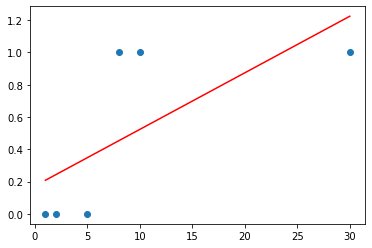

In [96]:
# logistic Regression이 필요한 이유 ( 기존의 linear regression으로는 안되는 이유)
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
x = np.array([1,2,5,8,10,30])
y = np.array([0,0,0,1,1,1])
lm = stats.linregress(x,y)
print('w값은',lm[0],'b값은',lm[1])
plt.scatter(x,y)
plt.plot(x,x*lm[0]+lm[1],'r')
plt.show()

In [ ]:
# 교안 pt.51

In [15]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

# training data set
x_data = np.array([[10,0],
                   [8,1],
                   [3,3],
                   [2,3],
                   [5,1],
                   [2,0],
                   [1,0]])
y_data = np.array([[1],
                   [1],
                   [1],
                   [1],
                   [0],
                   [0],
                   [0]])

# placeholder
X = tf.placeholder(shape=[None,2],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)

# Weight & bias #weight는 X가 7행2열이기 때문에 2행1열이여야 한다.
W = tf.Variable(tf.random_normal([2,1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

# Hypothesis
logits = tf.matmul(X,W)+b # 선형회귀식
# logistic regression에서는 시그모이드형 가설을 만들어야한다.
H = tf.nn.sigmoid(logits) # 1과0 사이에서만 움직인다.

# cost function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)) 
# localminimum을 해결하기 위해 log를 사용해야함 sigmoid_cross_entropy

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,3001):
    _,cost_val = sess.run([train,cost],feed_dict={X:x_data,Y:y_data})
    if step%300 ==0:
        print("{}번째 cost : {}".format(step,cost_val))




300번째 cost : 0.25916367769241333
600번째 cost : 0.21750997006893158
900번째 cost : 0.19417069852352142
1200번째 cost : 0.17769493162631989
1500번째 cost : 0.1647474616765976
1800번째 cost : 0.15397118031978607
2100번째 cost : 0.14469464123249054
2400번째 cost : 0.13653835654258728
2700번째 cost : 0.12926506996154785
3000번째 cost : 0.1227145716547966


In [16]:
# 학습이 잘 되었는지 확인
# Accuracy
predict = tf.cast(H>0.5, dtype = tf.float32) # 맞으면 1 틀리면 0
# correct Y 와 predict를 비교해서 맞으면 1 틀리면 0 
correct = tf.equal(predict,Y) 
# correct를 다 더해서 평균을 낸게 accuracy 
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('정확도 : {}'.format(sess.run(accuracy,feed_dict={X:x_data,Y:y_data})))

정확도 : 1.0


In [17]:
# 예측
print('H 결과 : ',sess.run(H,feed_dict={X:[[3,3]],Y:y_data}))
print('predict 결과 : ',sess.run(predict,feed_dict={X:[[3,3]],Y:y_data}))

H 결과 :  [[0.96571136]]
predict 결과 :  [[1.]]


# 6. multinomial classification(3개이상 그룹)
- 퀴즈 1,2,3 성적과 출석에 따른 A,B,C 등급 분류

In [19]:
# training data set
x_data = [[10,7,8,5],
          [8,8,9,4],
          [7,8,2,3],
          [6,3,9,3],
          [7,5,7,4],
          [3,5,6,2],
          [2,4,3,1]]
# 종속변수는 multinomial classification에서는 원핫인코딩
# 종류를 정렬로 분류해서 숫자로 표현 1이면 해당 종류 0이면 아닌것
y_data=[[1,0,0],
        [1,0,0],
        [0,1,0],
        [0,1,0],
        [0,1,0],
        [0,0,1],
        [0,0,1]]

# placeholder
X = tf.placeholder(shape=[None,4],dtype=tf.float32)
Y = tf.placeholder(shape=[None,3],dtype=tf.float32)

# Weight(4행3열) & bias(종속변수가 3개니까 3개)
W = tf.Variable(tf.random_normal([4,3]),name='weight')
b = tf.Variable(tf.random_normal([3]),name='bias')

# hypothesis
logits = X@W + b
# 3그룹 이상할때는 softmax를 사용
H = tf.nn.softmax(logits) # softmax분류분석 최종단계에서 결과의 합이 1이되도록 하기 위함.

# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y)) 
# localminimum을 해결하기 위해 log를 사용해야함 softmax_cross_entropy

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,6001):
    _,cost_val = sess.run([train,cost],feed_dict={X:x_data,Y:y_data})
    if step%300 ==0:
        print("{}번째 cost : {}".format(step,cost_val))


300번째 cost : 1.1226388216018677
600번째 cost : 0.9048743844032288
900번째 cost : 0.6417874693870544
1200번째 cost : 0.5408558249473572
1500번째 cost : 0.49936842918395996
1800번째 cost : 0.44717565178871155
2100번째 cost : 0.05233731493353844
2400번째 cost : 0.04748464748263359
2700번째 cost : 0.04386258125305176
3000번째 cost : 0.04094325751066208
3300번째 cost : 0.03849465772509575
3600번째 cost : 0.03638673573732376
3900번째 cost : 0.034538235515356064
4200번째 cost : 0.03289522975683212
4500번째 cost : 0.031419578939676285
4800번째 cost : 0.030083170160651207
5100번째 cost : 0.02886469103395939
5400번째 cost : 0.02774754725396633
5700번째 cost : 0.02671830914914608
6000번째 cost : 0.02576616033911705


In [23]:
# 예측
result = sess.run(H,feed_dict={X:[[8,8,9,4]]})
print(result.argmax(axis=1)) # 0번째 열이 1 = A

[0]


In [31]:
# accuracy 측정
# H => 0.97 0.19 0.002 의 경우 H.argmax => 0
# Y => 1     0     0   의 경우 Y.argmax => 0
# 결론 둘다 같은 값이 도출된 경우 맞다고 본다. 
predict = tf.argmax(H, axis=1) # 어떤 열의 값이 제일 큰지 index 반환
correct = tf.equal(predict,tf.argmax(Y,axis=1))
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
print(sess.run(accuracy,feed_dict={X:x_data,Y:y_data})*100,'%')

100.0 %


# 7. XOR Problem
- 머신러닝의 한계

In [35]:
# traing data set
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]
y_data = [[0],
          [1],
          [1],
          [0]]
# placeholder
X = tf.placeholder(shape=[None,2],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)

# Weigth & bias
W = tf.Variable(tf.random_normal([2,1]),name = 'weight')
b = tf.Variable(tf.random_normal([1]),name = 'bias')

# hypothesis
logits = X@W +b
H = tf.nn.sigmoid(logits)

# cost function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# session & variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,6001):
    _,c_val = sess.run([train,cost],feed_dict={X:x_data,Y:y_data})
    if step%200==0:
        print('{}번째 cost : {}'.format(step,c_val))


200번째 cost : 0.7805773019790649
400번째 cost : 0.7656377553939819
600번째 cost : 0.7536606192588806
800번째 cost : 0.7437700629234314
1000번째 cost : 0.7355310916900635
1200번째 cost : 0.7286538481712341
1400번째 cost : 0.7229111790657043
1600번째 cost : 0.7181155681610107
1800번째 cost : 0.7141095399856567
2000번째 cost : 0.7107614278793335
2200번째 cost : 0.7079613208770752
2400번째 cost : 0.7056176662445068
2600번째 cost : 0.7036541700363159
2800번째 cost : 0.7020078301429749
3000번째 cost : 0.7006258964538574
3200번째 cost : 0.699464738368988
3400번째 cost : 0.698488175868988
3600번째 cost : 0.6976660490036011
3800번째 cost : 0.6969732642173767
4000번째 cost : 0.6963889598846436
4200번째 cost : 0.6958956122398376
4400번째 cost : 0.6954787969589233
4600번째 cost : 0.6951263546943665
4800번째 cost : 0.6948280930519104
5000번째 cost : 0.6945754289627075
5200번째 cost : 0.6943613886833191
5400번째 cost : 0.6941797733306885
5600번째 cost : 0.6940257549285889
5800번째 cost : 0.6938949823379517
6000번째 cost : 0.6937838792800903


In [39]:
# predict
print(sess.run(H,feed_dict={X:[[0,0]]}))
predict = tf.cast(H>0.5,dtype = tf.float32)
print(sess.run(predict,feed_dict={X:[[0,0]]})) # 에측 실패 

# accuracy
correct = tf.equal(predict,Y)
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
print('accuracy :',sess.run(accuracy,feed_dict={X:x_data,Y:y_data})*100,'%')

[[0.52829593]]
[[1.]]
accuracy : 50.0 %


In [ ]:
# 결론적으로 머신러닝으로는 답을 찾을 수 없다.
# 그래서 딥러닝이 해결책으로 나옴.

# 8. Deep learning XOR 예제

In [46]:
# weight & bias를 여러번 잡아주는 것을 deep learning이라 한다. 

# traing data set
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]
y_data = [[0],
          [1],
          [1],
          [0]]
# placeholder
X = tf.placeholder(shape=[None,2],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)

# layer 추가
# Weigth & bias(layer1 = 입력2개 출력 4개)
W1 = tf.Variable(tf.random_normal([2,4]),name = 'weight1')
b1 = tf.Variable(tf.random_normal([4]),name = 'bias1')
layer1 = tf.nn.sigmoid(tf.matmul(X,W1)+b1)
# Weigth & bias(layer2 = 입력4개 출력 1개)
W2 = tf.Variable(tf.random_normal([4,1]),name='weight2')
b2 = tf.Variable(tf.random_normal([1]),name='bias2')

# hypothesis
logits = tf.matmul(layer1,W2) +b2
H = tf.nn.sigmoid(logits)

# cost function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# session & variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,6001):
    _,c_val = sess.run([train,cost],feed_dict={X:x_data,Y:y_data})
    if step%200==0:
        print('{}번째 cost : {}'.format(step,c_val))

#predict
print(sess.run(H,feed_dict={X:[[0,0]]}))
predict = tf.cast(H>0.5,dtype = tf.float32)
print(sess.run(predict,feed_dict={X:[[0,0]]})) # 에측 실패 

# accuracy
correct = tf.equal(predict,Y)
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
print('accuracy :',sess.run(accuracy,feed_dict={X:x_data,Y:y_data})*100,'%')

200번째 cost : 0.7059744596481323
400번째 cost : 0.6889203786849976
600번째 cost : 0.6863573789596558
800번째 cost : 0.6856194734573364
1000번째 cost : 0.6851043701171875
1200번째 cost : 0.6846063137054443
1400번째 cost : 0.6840981841087341
1600번째 cost : 0.6835751533508301
1800번째 cost : 0.6830353736877441
2000번째 cost : 0.682477593421936
2200번째 cost : 0.6819003224372864
2400번째 cost : 0.6813024878501892
2600번째 cost : 0.6806825995445251
2800번째 cost : 0.6800394058227539
3000번째 cost : 0.6793715953826904
3200번째 cost : 0.6786776781082153
3400번째 cost : 0.6779565811157227
3600번째 cost : 0.677206814289093
3800번째 cost : 0.6764271259307861
4000번째 cost : 0.6756160259246826
4200번째 cost : 0.6747724413871765
4400번째 cost : 0.6738948822021484
4600번째 cost : 0.6729821562767029
4800번째 cost : 0.67203289270401
5000번째 cost : 0.6710459589958191
5200번째 cost : 0.6700199246406555
5400번째 cost : 0.6689538359642029
5600번째 cost : 0.6678463220596313
5800번째 cost : 0.666696310043335
6000번째 cost : 0.6655029058456421
[[0.48249313]]
[[0.

In [48]:
# weight & bias를 더 추가하여 accuracy 올리기 
# 중간 layer는 sigmoid가 아닌 relu로 바꿔준다. 값의 증폭은 layer안에서만 이루어짐
# 마지막 layer만 sigmoid

#traing data set
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]
y_data = [[0],
          [1],
          [1],
          [0]]
# placeholder
X = tf.placeholder(shape=[None,2],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)

# layer 추가
# Weight & bias(layer1 = 입력2개 출력 10개)
W1 = tf.Variable(tf.random_normal([2,10]),name = 'weight1')
b1 = tf.Variable(tf.random_normal([10]),name = 'bias1')
layer1 = tf.nn.relu(tf.matmul(X,W1)+b1)
# Weight & bias(layer2 = 입력10개 출력 20개)
W2 = tf.Variable(tf.random_normal([10,20]),name='weight2')
b2 = tf.Variable(tf.random_normal([20]),name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1,W2)+b2)
# Weight & bias(layer3 = 입력20개 출력 10개)
W3 = tf.Variable(tf.random_normal([20,10]),name='weight3')
b3 = tf.Variable(tf.random_normal([10]),name='bias3')
layer3 = tf.nn.relu(tf.matmul(layer2,W3)+b3)
# Weight & bias(output layer4 = 입력10개 출력 1개)
W4 = tf.Variable(tf.random_normal([10,1]),name='weight4')
b4 = tf.Variable(tf.random_normal([1]),name='bias4')

# hypothesis
logits = tf.matmul(layer3,W4) + b4
H = tf.nn.sigmoid(logits)

# cost function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# session & variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,6001):
    _,c_val = sess.run([train,cost],feed_dict={X:x_data,Y:y_data})
    if step%200==0:
        print('{}번째 cost : {}'.format(step,c_val))

#predict
print(sess.run(H,feed_dict={X:[[0,0]]}))
predict = tf.cast(H>0.5,dtype = tf.float32)
print(sess.run(predict,feed_dict={X:[[0,0]]})) # 에측 실패 

# accuracy
correct = tf.equal(predict,Y)
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
print('accuracy :',sess.run(accuracy,feed_dict={X:x_data,Y:y_data})*100,'%')

200번째 cost : 0.018986893817782402
400번째 cost : 0.00784554984420538
600번째 cost : 0.004876712802797556
800번째 cost : 0.0034887564834207296
1000번째 cost : 0.002681032055988908
1200번째 cost : 0.0021583165507763624
1400번째 cost : 0.0017951859626919031
1600번째 cost : 0.0015298031503334641
1800번째 cost : 0.0013282066211104393
2000번째 cost : 0.0011703374329954386
2200번째 cost : 0.0010437307646498084
2400번째 cost : 0.0009402370196767151
2600번째 cost : 0.0008544259471818805
2800번째 cost : 0.0007827597437426448
3000번째 cost : 0.00072237360291183
3200번째 cost : 0.000670163834001869
3400번째 cost : 0.0006245214026421309
3600번째 cost : 0.0005842975806444883
3800번째 cost : 0.0005486329318955541
4000번째 cost : 0.0005167925846762955
4200번째 cost : 0.0004881964123342186
4400번째 cost : 0.00046240835217759013
4600번째 cost : 0.0004390371323097497
4800번째 cost : 0.00041775882709771395
5000번째 cost : 0.00039831726462580264
5200번째 cost : 0.0003804986481554806
5400번째 cost : 0.00036408755113370717
5600번째 cost : 0.0003489548107609153
